In [33]:
import itertools

import corr
import matplotlib.pyplot as plt
import torch_lddmm

In [17]:
frames = corr.load_example_experiment()
template_idx = corr.find_highest_correlation(frames)
template = frames[template_idx]

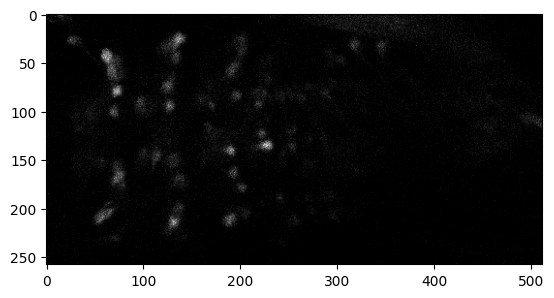

In [18]:
plt.imshow(template, cmap="gray")
# normalize images before applying lddmm
plt.show()

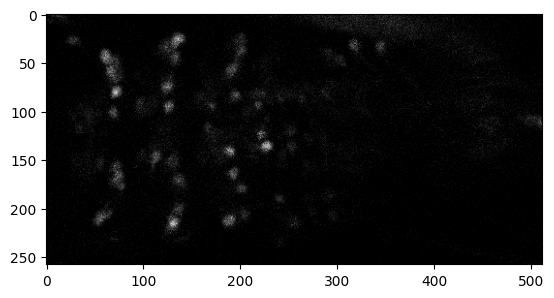

In [28]:
plt.imshow(frames[0], cmap="gray")

In [48]:
lddmm = torch_lddmm.LDDMM(template=template, target=frames[0], a=1, epsilon=1.0,
                          sigma=4, sigmaR=2, dx=[0.1,0.1,0.1], dtype="float")
# create object
lddmm.run() # run registration with these settings
deformed_template = lddmm.outputDeformedTemplate() # output deformed template as numpy array


Current parameters:
>    a               = 1 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 100 (number of iterations)
>    epsilon         = 1.0 (gradient descent step size)
>    epsilonL        = 1e-07 (gradient descent step size, affine)
>    epsilonT        = 2e-05 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = 4 (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 2 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 0 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid, 3 = rigid + scale)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (in

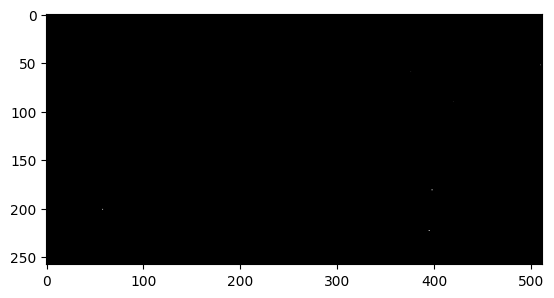

In [61]:
plt.imshow(deformed_template[0], cmap="gray")

In [58]:
deformed_template[0].max()

524.2787

In [46]:
def grid_search() -> dict:
    """Search for any parameter combination not resulting in an empty image."""
    min_param = 1
    max_param = 10
    step_size = 1
    parameter_list = ["a", "epsilon", "sigma", "sigmaR"]

    values = list(range(min_param,max_param+1,step_size))
    combinations = list(itertools.product(values, repeat=len(parameter_list)))
    for combo in combinations:
        params = dict(zip(parameter_list, combo, strict=False))
        lddmm = torch_lddmm.LDDMM(template=template, target=frames[0], a=params["a"],
                      epsilon=params["epsilon"], sigma=params["sigma"],
                        sigmaR=params["sigmaR"], dx=[0.1,0.1,0.1], dtype="float")
        lddmm.run()
        deformed_template = lddmm.outputDeformedTemplate()
        if deformed_template[0].max() > 0:
            break
    return params

In [47]:
good_params = grid_search()


Current parameters:
>    a               = 1 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 100 (number of iterations)
>    epsilon         = 1 (gradient descent step size)
>    epsilonL        = 1e-07 (gradient descent step size, affine)
>    epsilonT        = 2e-05 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = 1 (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 1 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 1 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 0 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid, 3 = rigid + scale)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (inde